In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# download from https://evictionlab.org/get-the-data/
# Choose VA => choose "all.csv" (Change the file name to 'VA.csv')
df = pd.read_csv('VA.csv')

In [3]:
df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

In [4]:
df.shape

(133196, 26)

In [5]:
df_clean = df.dropna(axis=0, how='any')

In [6]:
df_clean.shape

(105830, 26)

In [7]:
df_clean = df_clean[df_clean['eviction-rate']<100]

In [8]:
df_clean.shape

(105782, 26)

In [9]:
df_county_1=df_clean[(df_clean['parent-location'] != 'USA') & (df_clean['parent-location'] != 'Virginia')]

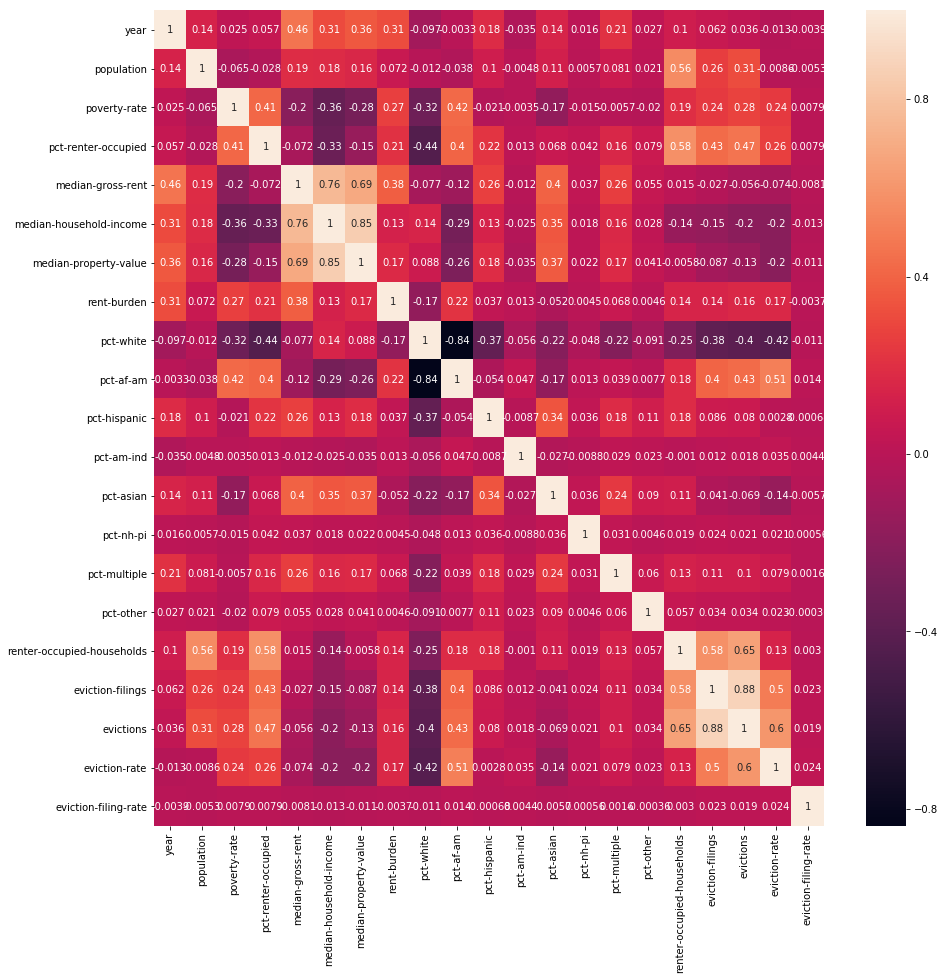

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df_county_1.drop(['GEOID','name','parent-location','imputed','subbed'],axis=1).corr(),annot=True)

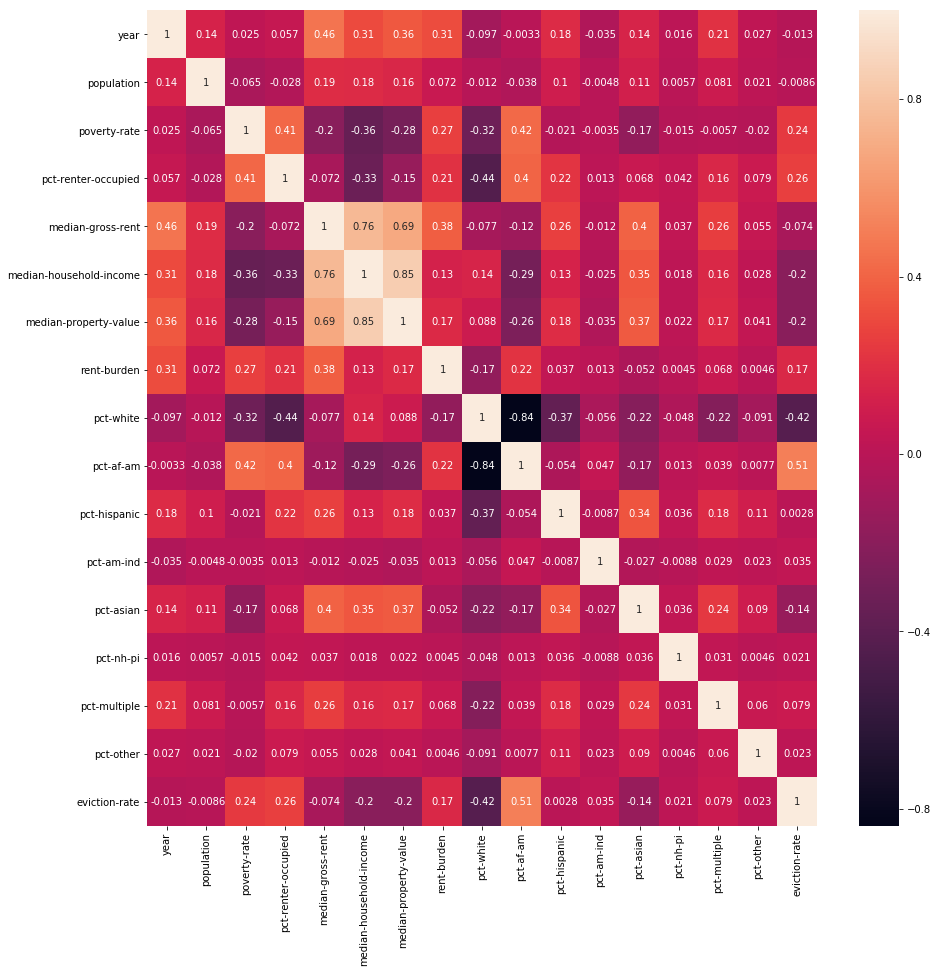

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df_county_1.drop(['GEOID','name','parent-location','imputed','subbed','eviction-filings','evictions','eviction-filing-rate',
                           'renter-occupied-households'],axis=1).corr(),annot=True)

In [12]:
df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

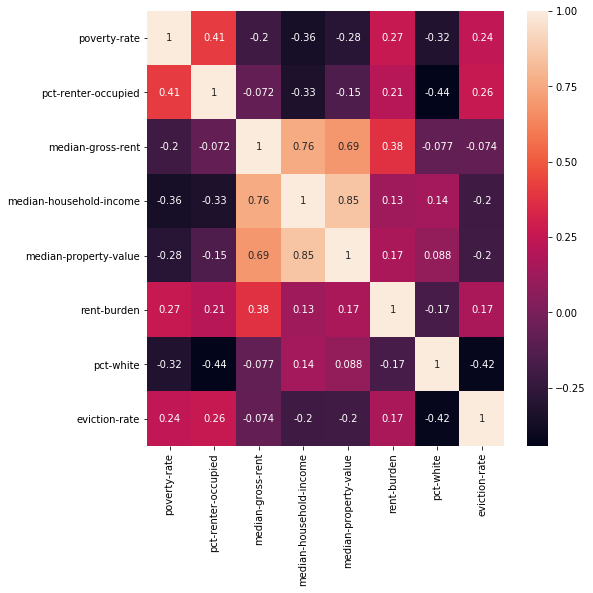

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df_county_1.drop(['GEOID','name','year','parent-location','population','imputed','subbed','eviction-filings','evictions','eviction-filing-rate',
                           'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi',
                            'pct-multiple', 'pct-other'],axis=1).corr(),annot=True)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Linear Regression

In [15]:
df_county_1.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

# Year 2000 to 2004

(31802, 26)
Linear Regression Intercept:  8.640731390784746
MAE: 3.5990707939951623
MSE: 26.948397728565666
RMSE: 5.19118461707592
Training set score: 0.2091738728
Test set score: 0.2196295166


/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     3337.
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:10:52   Log-Likelihood:                -69389.
No. Observations:               22261   AIC:                         1.388e+05
Df Residuals:                   22254   BIC:                         1.388e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
poverty-rate                0.1022      0.005     20.351      0.000       0.092       0.112
pct-renter-occupied         0.0628      0.002     34.939      0.000       0.059       0.066
median-gross-rent          -0.0003      0.000     -1.649      0.099      -0.001    6.25e-05
median-household-income  9.085e-05   3.73e-06     24.359      0.000    8.35e-05    9.82e-05
median-property-value   -2.851e-05   9.35e-07    -30.495      0.000   -3.03e-05   -2.67e-05
rent-burden                 0.1043      0.004     23.171      0.000       0.095       0.113
pct-white                  -0.0116      0.001    -11.269      0.000      -0.014      -0.010
==============================================================================
Omnibus:                    13516.087   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335491.607
Skew:                           2.479   Prob(JB):                         0.00
Kurtosis:                      21.361   Cond. No.                     2.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

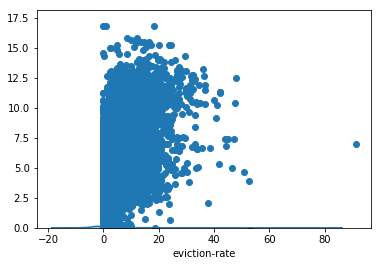

In [16]:
df_county=df_county_1[(df_county_1['year'] == 2000) | (df_county_1['year'] == 2001) | (df_county_1['year'] == 2002) |
                     (df_county_1['year'] == 2003) | (df_county_1['year'] == 2004)]

print(df_county.shape)

X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

print('Linear Regression Intercept: ',lm.intercept_)

coeff_df = pd.DataFrame(10**2*lm.coef_,X.columns,columns=['Coefficient * 100'])
coeff_df

predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Training set score: %.10f" % lm.score(X_train, y_train))
print("Test set score: %.10f" % lm.score(X_test, y_test))

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

est = sm.OLS(y_train,X_train).fit()

est.summary()

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Training set score: 0.7714324618
Test set score: 0.6178219001
MAE: 2.3950936306698525
MSE: 13.19768963360209
RMSE: 3.6328624572920583
Feature ranking:
1. feature 6 (pct-white) (0.289027)
2. feature 1 (pct-renter-occupied) (0.146431)
3. feature 4 (median-property-value) (0.142527)
4. feature 5 (rent-burden) (0.133293)
5. feature 2 (median-gross-rent) (0.109401)
6. feature 0 (poverty-rate) (0.095066)
7. feature 3 (median-household-income) (0.084256)


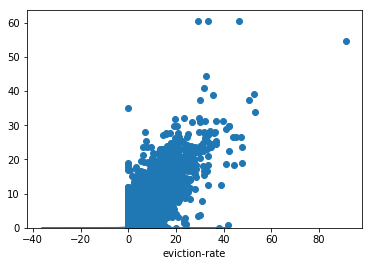

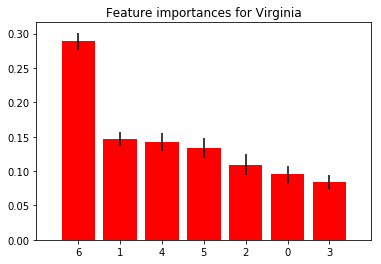

In [17]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# year 2005 to 2009

linear regression

(29400, 26)
Linear Regression Intercept:  8.547415444300304
MAE: 3.334264560621273
MSE: 22.7287941473449
RMSE: 4.767472511440931
Training set score: 0.1967870904
Test set score: 0.2011089497


/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     3024.
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        03:10:55   Log-Likelihood:                -63256.
No. Observations:               20580   AIC:                         1.265e+05
Df Residuals:                   20573   BIC:                         1.266e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
poverty-rate                0.3485      0.017     20.832      0.000       0.316       0.381
pct-renter-occupied         0.0747      0.002     43.611      0.000       0.071       0.078
median-gross-rent           0.0006      0.000      5.114      0.000       0.000       0.001
median-household-income   5.61e-05   2.21e-06     25.370      0.000    5.18e-05    6.04e-05
median-property-value   -1.002e-05   4.36e-07    -22.981      0.000   -1.09e-05   -9.17e-06
rent-burden                 0.0503      0.003     16.212      0.000       0.044       0.056
pct-white                  -0.0095      0.001     -9.224      0.000      -0.011      -0.007
==============================================================================
Omnibus:                    12731.234   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           344740.111
Skew:                           2.516   Prob(JB):                         0.00
Kurtosis:                      22.409   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

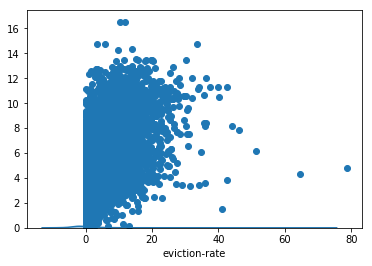

In [18]:
df_county=df_county_1[(df_county_1['year'] == 2005) | (df_county_1['year'] == 2006) | (df_county_1['year'] == 2007) |
                     (df_county_1['year'] == 2008) | (df_county_1['year'] == 2009)]

print(df_county.shape)

X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

print('Linear Regression Intercept: ',lm.intercept_)

coeff_df = pd.DataFrame(10**2*lm.coef_,X.columns,columns=['Coefficient * 100'])
coeff_df

predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Training set score: %.10f" % lm.score(X_train, y_train))
print("Test set score: %.10f" % lm.score(X_test, y_test))

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

est = sm.OLS(y_train,X_train).fit()

est.summary()

/opt/conda/envs/data3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


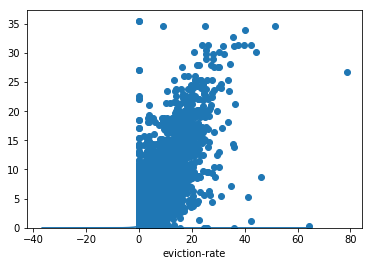

In [19]:
X = df_county.drop(['GEOID','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian','pct-nh-pi', 'pct-multiple', 'pct-other','population','year'],axis=1)
y = df_county['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=10)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions),bins=50);



Training set score: 0.7599322244
Test set score: 0.5267509312
MAE: 2.317734660774444
MSE: 13.464139649570072
RMSE: 3.669351393580352
Feature ranking:
1. feature 6 (pct-white) (0.300477)
2. feature 4 (median-property-value) (0.150429)
3. feature 1 (pct-renter-occupied) (0.118874)
4. feature 3 (median-household-income) (0.115285)
5. feature 0 (poverty-rate) (0.113756)
6. feature 2 (median-gross-rent) (0.102714)
7. feature 5 (rent-burden) (0.098465)


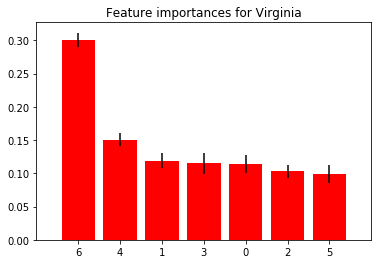

In [20]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Virginia")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
y_test

14799     1.02
19218     2.03
80860     0.57
73081     1.57
92051     0.91
45808     0.00
71438    21.14
11219     0.98
48460     1.13
87077    14.06
28009     7.64
57117     0.00
88237    16.02
80657     4.24
48710    21.27
87901     2.79
49617     4.04
89738     2.92
91391     8.78
67337     1.10
51348     0.00
67868     6.64
47591     0.00
73497     1.48
46408     4.83
48339     2.22
80531    10.38
73180     1.35
47260     0.00
91121     1.19
         ...  
16329     3.43
58188     0.00
54387     5.56
70119     4.29
93920     7.24
69357     4.72
50428     1.26
13928     0.00
74827     4.94
12612     5.15
79041     7.21
20330     6.11
89430     8.17
80377     7.68
70889    10.48
72908     2.06
46467     0.00
93139     5.51
88177    12.09
48679    16.36
63318     6.73
46061     3.74
72680     2.29
80220     0.00
45008     0.16
66627     0.21
95568     0.68
56548     0.00
21408     2.74
80217    10.00
Name: eviction-rate, Length: 8820, dtype: float64